<a href="https://colab.research.google.com/github/JayeshK10/Glass-vs-NoGlass-Classification/blob/main/Glass_vs_NoGlass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Major Project

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import shutil
import random
import pickle


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, classification_report

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from numpy import linalg as LA
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


# Data Loading

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Data_set/Kaggle"

In [ ]:
!kaggle datasets download -d jeffheaton/glasses-or-no-glasses

In [ ]:
!unzip /content/glasses-or-no-glasses.zip -d /content/drive/MyDrive/Data_set/Proj

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/Data_set/Proj/faces-spring-2020/faces-spring-2020/face-100.png  
  inflating: /content/drive/MyDrive/Data_set/Proj/faces-spring-2020/faces-spring-2020/face-1000.png  
  inflating: /content/drive/MyDrive/Data_set/Proj/faces-spring-2020/faces-spring-2020/face-1001.png  
  inflating: /content/drive/MyDrive/Data_set/Proj/faces-spring-2020/faces-spring-2020/face-1002.png  
  inflating: /content/drive/MyDrive/Data_set/Proj/faces-spring-2020/faces-spring-2020/face-1003.png  
  inflating: /content/drive/MyDrive/Data_set/Proj/faces-spring-2020/faces-spring-2020/face-1004.png  
  inflating: /content/drive/MyDrive/Data_set/Proj/faces-spring-2020/faces-spring-2020/face-1005.png  
  inflating: /content/drive/MyDrive/Data_set/Proj/faces-spring-2020/faces-spring-2020/face-1006.png  
  inflating: /content/drive/MyDrive/Data_set/Proj/faces-spring-2020/faces-spring-2020/face-1007.png  
  inflating: /content/drive/MyDr

# Dataset

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Data_set/Proj/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Data_set/Proj/test.csv')

In [ ]:
df_train.head()

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,...,v474,v475,v476,v477,v478,v479,v480,v481,v482,v483,v484,v485,v486,v487,v488,v489,v490,v491,v492,v493,v494,v495,v496,v497,v498,v499,v500,v501,v502,v503,v504,v505,v506,v507,v508,v509,v510,v511,v512,glasses
0,1,0.37797,-0.94808,0.01346,0.17893,0.37795,0.63571,0.13943,-0.25607,-0.39341,1.08947,-1.36048,-1.31529,0.36119,-0.62857,-1.65290,1.47167,-0.88741,-0.25942,-0.34414,-0.38914,0.38425,-0.50553,-0.09451,0.30568,-1.07570,-0.65924,1.10918,1.22234,-0.12479,0.50198,-0.63932,0.61505,1.16747,0.36921,-0.44398,0.46192,-0.83207,-0.74952,-0.40722,...,0.54072,-0.71995,1.11262,-0.11429,0.85618,0.17233,-1.06815,0.04569,-0.13031,2.07549,0.47934,0.69172,1.37139,0.45480,-0.96053,0.06319,0.09664,-0.34749,0.09889,-0.87606,0.82594,0.52841,0.84209,0.16771,0.59003,-0.22960,-0.04017,0.15554,-0.41569,0.68050,-0.03494,1.32443,-0.94570,0.02055,-1.23908,0.43507,1.08635,1.69027,0.61609,0
1,2,0.07609,-0.09774,0.39666,-0.39026,0.10606,0.52774,0.07105,0.33720,0.69917,-0.02842,-0.56431,0.42060,-0.47533,1.60025,-0.02106,-2.30193,-0.31614,-0.08050,0.85041,-0.10574,-0.33177,-1.32102,-0.22244,-0.52076,0.40012,-0.41339,-0.15176,1.02155,-0.52834,0.66718,0.54844,0.18323,0.28764,-0.80084,-0.85040,0.45097,0.88317,-1.13375,-1.85301,...,-0.25966,-1.19259,-0.71514,-0.08903,-0.58853,-0.20697,-0.77025,-1.21129,-0.67575,0.32509,-0.35147,-0.33581,-0.31505,-1.66721,0.40666,0.15053,-0.77809,0.35837,-1.10950,0.03764,-0.93728,-0.68952,-0.92334,-0.35401,-1.20552,1.10199,0.46268,0.85954,-0.48484,-0.54585,0.86624,-1.24953,-0.21511,-1.54146,1.04765,-1.24035,0.00866,-1.27640,-0.60496,1
2,3,1.19391,-0.68707,-0.68422,-0.36378,-0.60847,-0.40118,1.45432,0.00592,1.68940,-0.98205,0.67435,-1.27604,-1.37050,-0.91682,0.23617,0.53676,-0.26815,-0.66989,0.46076,-0.04117,1.34078,0.46545,-0.25943,-0.22918,-0.49346,-0.53558,0.69776,1.15477,0.01293,-0.86763,-0.08987,0.54660,0.09142,-0.21663,-0.28233,0.15426,-1.02164,-0.24342,-0.18844,...,0.91472,-0.29778,0.45507,0.03296,-0.79752,1.19759,-0.45417,0.15993,0.39516,-0.87621,0.05737,-0.99432,1.19910,0.78989,-0.13908,0.12384,0.38121,0.05699,-0.89445,-0.67448,-0.07669,-1.50409,0.07962,0.95116,0.72782,-0.88516,0.40735,0.10415,0.31639,-0.34801,-0.35893,0.02330,0.31548,-0.34923,-0.41772,-0.58175,-0.60177,0.43555,0.41982,1
3,4,1.34949,-0.31498,-1.30248,0.50278,1.66292,-1.06094,-0.70835,-0.24237,-0.15509,-0.04532,0.97349,-0.21032,-0.71143,0.59725,-0.51849,0.00126,1.22219,0.57160,0.41212,0.90077,-0.80797,-1.20564,1.40774,0.49080,-1.05429,0.26300,-0.03849,-0.66792,-0.29260,0.47713,0.44967,0.44411,-0.13465,-0.20365,0.52841,-0.47348,0.39295,0.67695,0.40861,...,0.65551,-0.17916,0.55700,1.84589,0.70722,-0.55871,-1.18265,0.82509,-0.50715,0.71948,-1.08462,-0.05607,0.86918,-0.11338,-0.73700,-0.12130,0.81417,-0.61391,-0.90671,1.09301,0.37716,1.06373,-0.62199,-0.21279,-0.43245,-0.28904,-0.25435,-0.20458,-0.00398,1.18449,0.23942,0.20774,0.81792,-0.74814,-0.62521,0.01689,0.83997,-0.46986,0.06755,0
4,5,-0.03512,-0.34196,0.14230,1.50513,-0.14364,0.49429,0.07823,-0.04356,0.42009,-0.88828,0.13601,0.26917,0.11973,0.04378,1.06879,0.10060,-0.83331,-0.64776,0.26461,0.65249,-0.41807,0.65920,0.11838,-0.00525,-0.74657,-0.97743,-0.71398,-0.08356,-0.82942,0.60474,0.12790,-0.41187,-2.18319,0.27367,0.54507,0.26555,0.67382,-0.24832,0.43397,...,0.90449,-0.51652,-0.11353,1.59131,-0.15053,-0.03551,0.02906,0.16957,0.62629,0.71465,-0.77525,0.46366,0.03279,-0.17744,0.32256,0.16237,-0.52918,-1.07961,0.55594,0.07770,0.08003,0.86164,0.24552,-0.17842,0.57825,0.01275,-1.05442,-0.61130,0.72826,-1.61306,-1.78407,0.07465,1.50182,-0.41289,-0.55908,-0.29702,0.83641,0.59756,-0.20298,0


In [ ]:
df_test.head()

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,...,v473,v474,v475,v476,v477,v478,v479,v480,v481,v482,v483,v484,v485,v486,v487,v488,v489,v490,v491,v492,v493,v494,v495,v496,v497,v498,v499,v500,v501,v502,v503,v504,v505,v506,v507,v508,v509,v510,v511,v512
0,4501,0.48039,-0.32247,-0.44262,0.29790,-0.77143,-0.56951,0.03529,0.48645,-0.63543,0.75000,0.29010,0.08669,0.19906,0.30587,-1.79719,0.06829,0.62038,0.32769,0.64469,-0.42144,0.47307,0.11710,1.40788,1.04127,0.97327,0.51164,-0.14112,-0.01517,0.29937,1.49975,0.05655,-0.02548,-0.27233,0.82310,-0.77302,0.21942,-1.02719,-0.40690,-0.04652,...,-0.43258,-0.05353,0.01511,1.37163,-0.28317,0.65274,0.01200,0.69424,0.03361,-0.50692,0.04405,0.49495,0.42945,-0.07343,0.34660,0.73352,0.38583,0.02547,-0.12821,1.30098,1.48148,0.47298,-1.28547,0.75467,0.49884,0.44291,-0.07570,-0.19407,0.34382,0.45420,-0.43790,-0.19865,0.13175,-0.13886,-0.46022,0.02076,0.30127,-0.65184,-0.25504,0.51825
1,4502,1.65497,-0.40396,-0.87412,-0.32837,1.46875,-0.48871,-0.20227,0.79291,-0.02439,-0.11406,-0.32206,-0.14475,-0.86747,-0.35541,-0.78318,-0.54156,0.63320,0.98631,-0.22052,2.27720,-0.27826,-0.64161,0.14712,1.16911,-1.12794,-0.33891,-0.23329,0.45811,1.32992,0.51939,0.78339,-1.78915,0.11220,-0.51082,-0.38619,1.32296,0.07389,1.12430,0.17303,...,-1.12799,-0.88047,-0.95141,0.32268,0.58697,0.84437,0.66983,-0.85103,-0.17294,2.21460,2.13815,-0.69704,-0.53428,-0.19459,-0.10210,1.57845,-0.32257,0.21246,-0.54606,-0.07969,-0.84777,0.67162,-0.32843,0.34420,0.54584,1.06445,1.39185,-0.35809,-1.33405,-0.00797,-0.58606,-0.16235,0.55002,0.70387,-1.40386,0.43841,0.58029,-0.44552,0.40221,1.44524
2,4503,0.66835,-0.88843,-1.03717,0.50920,-0.93945,0.70357,-1.95965,-0.37262,-0.80676,-0.05403,-1.34780,0.19503,0.55796,0.16858,-0.39352,-0.03791,-0.25500,0.36126,0.67807,-0.53512,-0.82935,-0.21352,2.03372,-1.60035,-0.57054,1.04884,-0.71750,0.72999,0.84839,0.28721,-0.71140,0.93659,0.91941,-0.45665,-0.37849,0.47629,-0.04339,-0.92192,1.01287,...,-0.69209,0.97009,-0.68208,-0.45874,0.62082,-1.04236,-1.93371,-0.66715,-0.08620,0.30606,0.50982,0.13116,-0.60621,-0.03222,-0.64690,0.66750,-0.71349,-0.61030,0.19421,-0.73609,0.31039,0.21902,-0.78376,-1.69997,0.19939,0.21272,-0.04546,-0.44311,-0.95658,-0.62088,-0.45495,0.45731,0.61465,0.01531,0.71265,-0.70434,-1.68200,1.34367,-0.03853,1.13161
3,4504,0.07134,-1.13284,-1.13902,0.74864,-0.85493,-0.11121,-1.22545,0.23182,-0.38047,-0.29967,-0.66721,1.09815,1.17308,0.58445,0.17808,0.94927,-0.26127,0.67066,0.86740,-0.87543,0.76656,-0.42062,1.01780,-0.52015,-0.69878,0.70350,0.59300,1.02628,0.96566,-0.06260,-0.09269,1.38546,-0.14051,0.00893,-0.41666,0.43829,-0.90359,-0.34176,1.32364,...,0.13081,0.47319,-0.62745,-0.46227,-0.06048,-1.46718,-0.44049,0.45471,0.84449,0.53265,0.06971,-1.35370,-0.78573,-0.34925,-0.54150,0.69073,-0.54909,-0.78029,0.33353,-0.92915,0.81831,-1.43499,-0.59204,-0.91067,-0.32966,0.28000,0.24674,-0.30204,0.29245,0.04085,-0.43437,-0.33807,0.80499,0.68003,0.18299,-0.84725,-0.17401,0.07702,-0.00753,0.71057
4,4505,0.14553,-0.06097,-0.58112,0.16331,1.49490,0.17657,0.03536,-0.00338,-1.26814,-0.22160,0.80033,0.94657,-0.22396,0.10087,-0.61490,-0.61939,1.38021,-0.00364,-0.13712,-0.01226,-0.31197,-1.15202,-1.81040,-0.85482,-1.05028,0.12497,0.95427,0.83011,-0.21609,-1.13643,-0.35507,1.16981,0.10506,-0.65407,0.99415,0.58090,-1.66570,0.28062,1.05819,...,-0.18596,0.57251,-0.78092,-1.70683,-0.37654,-1.26424,-0.58572,-0.25384,-0.25056,-0.83915,-0.72246,0.69634,0.74308,1.49146,-0.49746,2.12015,1.10437,0.03344,-0.38598,-1.22402,-1.08769,0.35522,0.33312,-0.70236,-0.31817,0.05165,1.65635,1.05212,-0.66960,0.52041,-0.33725,-0.23850,0.17578,-0.25778,-0.47986,-0.74356,0.20894,-1.08812,-0.90550,-0.38300


# Data Preparation

In [ ]:
df_train['glasses'][56]

0

Example image

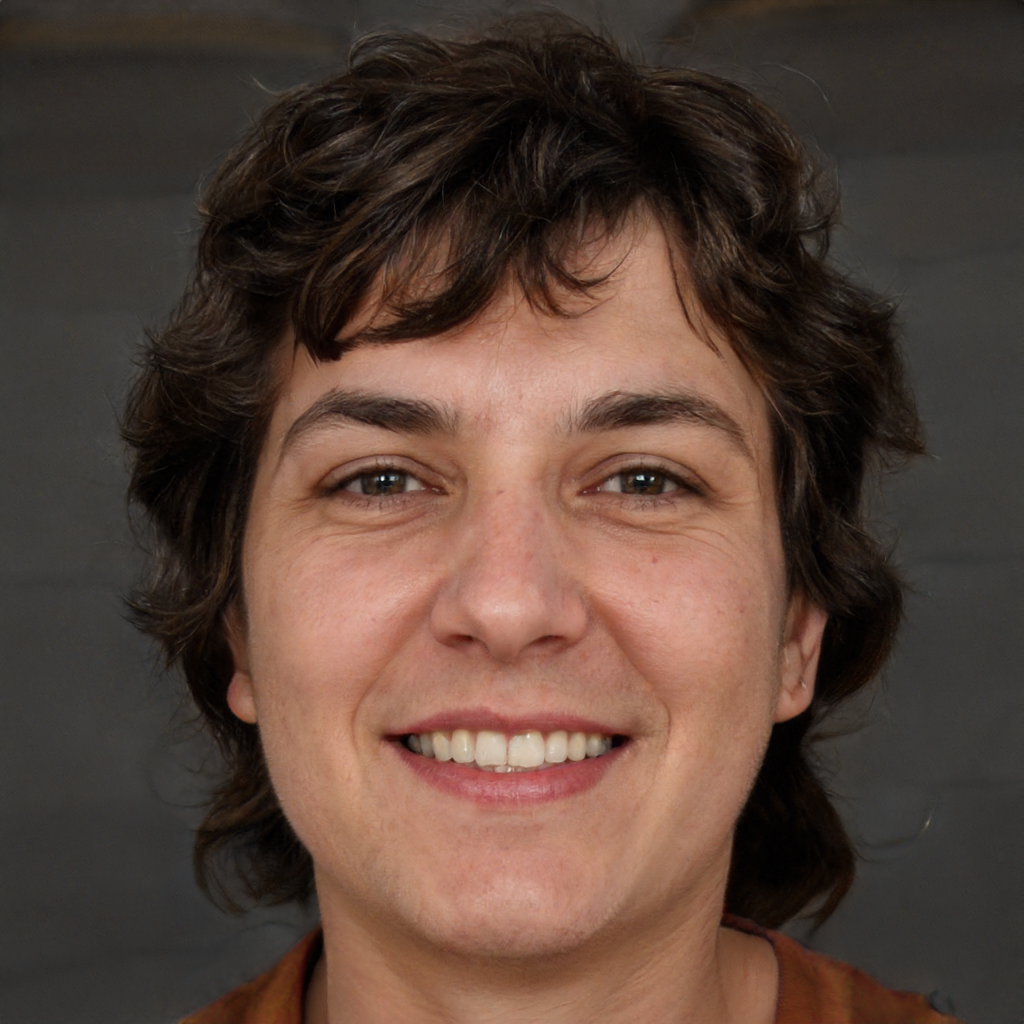

In [ ]:
from IPython.display import Image
display(Image("/content/drive/MyDrive/Data_set/Proj/faces-spring-2020/faces-spring-2020/face-57.png"))

sepearting glass/no-glass images 

In [ ]:
train_size = 0.8*len(df_train["glasses"])
val_size =  0.2*len(df_train["glasses"])
                    
print('Length of training + validation set', len(df_train["glasses"]))
print('Length of training set', train_size)
print('Length of validation set',val_size)

Length of training + validation set 4500
Length of training set 3600.0
Length of validation set 900.0


In [ ]:
#validation Set
with_glass_validation = []
without_glass_validation = []
glass_validation = []
for i in range(0,int(val_size)):
    a = "/content/drive/MyDrive/Data_set/Proj-validation/faces-spring-2020/faces-spring-2020/face-"+str(i+1)+".png"
    glass_validation.append(a)
    if df_train["glasses"][i] == 0 :
        without_glass_validation.append(a)
    else:
        with_glass_validation.append(a)

In [ ]:
import glob
import shutil
import os

src_dir = "/content/drive/MyDrive/Data_set/Proj/faces-spring-2020/faces-spring-2020"
dst_dir_g = "/content/drive/MyDrive/Data_set/Proj/glass"
dst_dir_ng = "/content/drive/MyDrive/Data_set/Proj/no_glass"
i = 0
for pngfile in glob.iglob(os.path.join(src_dir, "*.png")):
  if i == 4500:
    break
  else:
    if df_train["glasses"][i] == 0:
      dst_dir = dst_dir_ng
    else:
      dst_dir = dst_dir_g
    shutil.copy(pngfile, dst_dir)
  i += 1

In [ ]:
import glob
import shutil
import os

src_dir = "/content/drive/MyDrive/Data_set/Proj/faces-spring-2020/faces-spring-2020"
dst_dir_train_g = "/content/drive/MyDrive/Data_set/Proj/train/glass"
dst_dir_valid_g = "/content/drive/MyDrive/Data_set/Proj/validation/glass"
dst_dir_train_ng = "/content/drive/MyDrive/Data_set/Proj/train/no_glass"
dst_dir_valid_ng = "/content/drive/MyDrive/Data_set/Proj/validation/no_glass"
dst_dir_test = "/content/drive/MyDrive/Data_set/Proj/test"

i = 0
train = 0
valid = 0
test = 0
for pngfile in glob.iglob(os.path.join(src_dir, "*.png")):
	i+=1
	a = int(pngfile.split("/")[-1].split("-")[-1].split(".")[0])
	a = a-1
	if a >= 4500 and test<=500:
		test+=1
		dst_dir = dst_dir_test
	else:
		if train <= 3600 :
			train+=1
			if df_train["glasses"][a] == 0:
				dst_dir = dst_dir_train_ng
			else:
				dst_dir = dst_dir_train_g
		elif train>3600 and valid<=900:
			valid+=1
			if df_train["glasses"][a] == 0:
				dst_dir = dst_dir_valid_ng
			else:
				dst_dir = dst_dir_valid_g
		#print(i,a,df_train['glasses'][a])
	shutil.copy(pngfile, dst_dir)

print(train+valid)

In [ ]:
with_glass_train = []
without_glass_train = []

for i in range(int(val_size) , len(df_train["glasses"])):
    a = "/content/drive/MyDrive/Data_set/Proj/faces-spring-2020/faces-spring-2020/face-"+str(i+1)+".png"
    if df_train["glasses"][i] == 0 :
        without_glass_train.append(a)
    else:
        with_glass_train.append(a)

In [ ]:
with_glasses = []
without_glasses = []
for i in range(len(df_train["glasses"])):
    a = "face-"+str(i+1)
    if df_train["glasses"][i] == 0 :
        without_glasses.append(a)
    else:
        with_glasses.append(a)